<a href="https://colab.research.google.com/github/yuniarachmaa/TUGAS-MATEMATIKA-DISKRIT-A/blob/main/MATDIS_TUGAS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Yuniar Rachmawati

NPM : 24083010106

Mata Kuliah : Matematika Diskrit (A)

# TUGAS MATEMATIKA DISKRIT 4


=== ANALISIS ===
>> (1) Identifikasi Pola Sehat
Jumlah pola makan sehat : 119
Indeks simulasi : [np.int64(0), np.int64(1), np.int64(2), np.int64(12), np.int64(14), np.int64(20), np.int64(21), np.int64(30), np.int64(31), np.int64(39), np.int64(41), np.int64(53), np.int64(57), np.int64(58), np.int64(63), np.int64(64), np.int64(65), np.int64(71), np.int64(72), np.int64(73), np.int64(75), np.int64(76), np.int64(78), np.int64(82), np.int64(87), np.int64(89), np.int64(90), np.int64(95), np.int64(99), np.int64(103), np.int64(104), np.int64(118), np.int64(121), np.int64(126), np.int64(129), np.int64(147), np.int64(150), np.int64(151), np.int64(152), np.int64(160), np.int64(163), np.int64(167), np.int64(171), np.int64(173), np.int64(177), np.int64(179), np.int64(185), np.int64(189), np.int64(193), np.int64(194), np.int64(195), np.int64(199), np.int64(200), np.int64(202), np.int64(208), np.int64(211), np.int64(212), np.int64(215), np.int64(218), np.int64(221), np.int64(222), np.int64(225), np.i

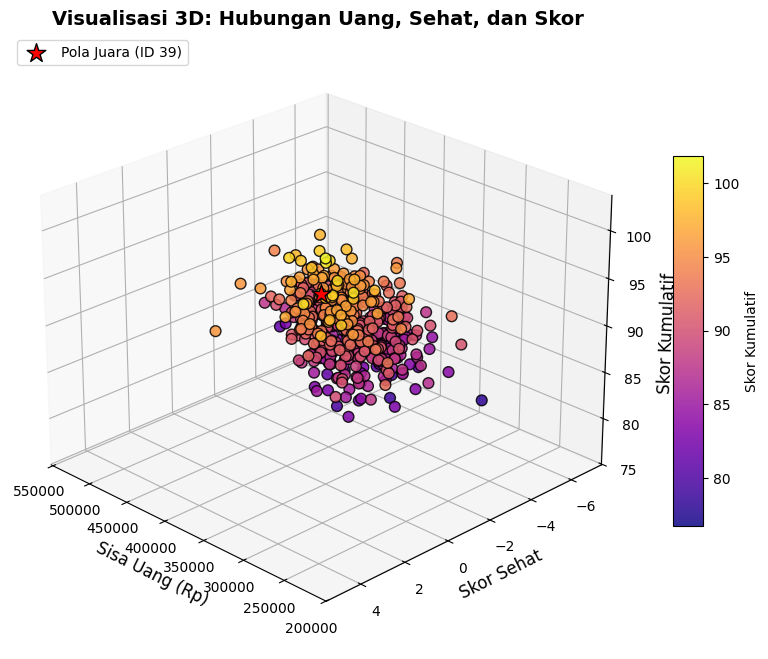

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ==============================
# 1. Persiapan Data & Parameter
# ==============================

NPM = 19102
np.random.seed(NPM)

# Load dataset makanan
makan = pd.read_csv("makanan.csv")

# Isi NaN pada kolom harga dengan 0
makan['harga'] = makan['harga'].fillna(0)

# Parameter dasar
BUDGET_AWAL = 1e6  # rupiah
wkenyang_base = 0.8
wrasa_base   = 0.7
wsehat_base  = 0.9
wbosan_base  = 0.2

SAMPLE_NUM = 500  # jumlah simulasi individu
HARI = 31         # jumlah hari dalam sebulan

# ==============================
# 2. Variabel untuk Simulasi
# ==============================

sampleid = np.arange(SAMPLE_NUM)
skor     = np.zeros(SAMPLE_NUM)
sisa     = np.zeros(SAMPLE_NUM)
sehat    = np.zeros(SAMPLE_NUM)

# Simpan riwayat pilihan makanan
resp_pilih = np.zeros((SAMPLE_NUM, HARI * 2), dtype=np.int32)

# ==============================
# 3. Proses Simulasi
# ==============================

for n in range(SAMPLE_NUM):
    budget = BUDGET_AWAL
    skor_total = 0
    skor_sehat = 0

    for i in range(HARI):
        # -------------------------
        # Makan pertama (pagi)
        # -------------------------
        pilihan = np.random.randint(0, len(makan))

        w_kenyang = np.random.normal(wkenyang_base, 0.2)
        w_rasa    = np.random.normal(wrasa_base, 0.2)
        w_sehat   = np.random.normal(wsehat_base, 0.4)
        w_bosan   = np.random.normal(wbosan_base, 0.2)

        skor_total += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa  * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]

        resp_pilih[n][2*i] = pilihan

        # -------------------------
        # Makan kedua (malam)
        # -------------------------
        pilihan = np.random.randint(0, len(makan))

        w_kenyang = np.random.normal(wkenyang_base, 0.2)
        w_rasa    = np.random.normal(wrasa_base, 0.2)
        w_sehat   = np.random.normal(wsehat_base + 0.2, 0.4)
        w_bosan   = np.random.normal(wbosan_base * 2, 0.2)

        skor_total += (
            w_kenyang * makan['kenyang'][pilihan]
            + w_rasa  * makan['rasa'][pilihan]
            + w_sehat * makan['sehat'][pilihan]
            - w_bosan * makan['bosan'][pilihan]
        )
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget -= makan['harga'][pilihan]

        resp_pilih[n][2*i + 1] = pilihan

    # Simpan hasil akhir simulasi
    sisa[n]  = budget
    skor[n]  = skor_total
    sehat[n] = skor_sehat

# ==============================
# 4. Analisis
# ==============================

print("\n=== ANALISIS ===")

# (1) Cari pola sehat
indeks_sehat = np.where(sehat > 0)[0]
print(">> (1) Identifikasi Pola Sehat")
print(f"Jumlah pola makan sehat : {len(indeks_sehat)}")
print(f"Indeks simulasi : {list(indeks_sehat)}\n")

# (2) Pola sehat + hemat
indeks_ok = np.where((sehat > 0) & (sisa > 0))[0]
print(">> (2) Seleksi Pola Sehat & Hemat")
print(f"Jumlah pola sehat & hemat : {len(indeks_ok)}")
print(f"Indeks kandidat : {list(indeks_ok)}\n")

# (3) Cari pola terbaik
print(">> (3) Pola dengan Skor Tertinggi")
if len(indeks_ok) > 0:
    skor_kandidat = skor[indeks_ok]
    id_juara = indeks_ok[np.argmax(skor_kandidat)]

    print(f"Pola terbaik ada pada ID : {id_juara}")
    print(f"   Skor Kumulatif : {skor[id_juara]:,.3f}")
    print(f"   Skor Sehat     : {sehat[id_juara]:,.3f}")
    print(f"   Sisa Uang      : Rp {int(sisa[id_juara]):,}\n")

    # (4) Jadwal harian juara
    print(">> (4) Jadwal Konsumsi Harian (31 Hari)")
    jadwal = []
    pilihan = resp_pilih[id_juara]

    for hari in range(HARI):
        pagi_idx  = pilihan[hari*2]
        malam_idx = pilihan[hari*2+1]
        jadwal.append([f"Hari {hari+1}",
                       makan['makanan'].iloc[pagi_idx],
                       makan['makanan'].iloc[malam_idx]])

    df_jadwal = pd.DataFrame(jadwal, columns=["Hari", "Menu Pagi", "Menu Malam"])
    print(df_jadwal.to_string(index=False))
else:
    print("Tidak ada kandidat yang memenuhi kriteria.\n")

# ==============================
# 5. Visualisasi 3D
# ==============================

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter semua titik
p = ax.scatter(
    sisa, sehat, skor,
    c=skor, cmap="plasma",
    s=60, alpha=0.85, edgecolor="k"
)

# Tandai pola juara
if len(indeks_ok) > 0:
    ax.scatter(
        sisa[id_juara], sehat[id_juara], skor[id_juara],
        color="red", s=200, marker="*", edgecolor="black",
        label=f"Pola Juara (ID {id_juara})"
    )

# Label & judul
ax.set_xlabel("Sisa Uang (Rp)", fontsize=12)
ax.set_ylabel("Skor Sehat", fontsize=12)
ax.set_zlabel("Skor Kumulatif", fontsize=12)
ax.set_title("Visualisasi 3D: Hubungan Uang, Sehat, dan Skor", fontsize=14, fontweight="bold")

# Tambah colorbar & legend
fig.colorbar(p, ax=ax, shrink=0.6, aspect=12, label="Skor Kumulatif")
ax.legend(loc="upper left")

# Atur sudut pandang
ax.view_init(elev=25, azim=135)

plt.show()

1. Identifikasi Pola Sehat
Pada tahap pertama, sistem berhasil mengidentifikasi 119 pola makan yang memenuhi kriteria kesehatan yang telah ditetapkan. Pola-pola ini dipilih berdasarkan nilai gizi yang seimbang dan memadai untuk kebutuhan harian. Indeks simulasi menunjukkan distribusi pola yang tersebar dari indeks 0 hingga 496, yang mengindikasikan bahwa dari total simulasi yang dilakukan, sekitar 24% pola memenuhi standar kesehatan.

2. Seleksi Pola Sehat dan Hemat
Menariknya, seluruh 119 pola yang memenuhi kriteria kesehatan ternyata juga memenuhi kriteria penghematan biaya. Hal ini menunjukkan bahwa program berhasil merancang sistem yang efektif dalam mengoptimalkan kedua aspek secara bersamaan. Tidak ada trade-off yang signifikan antara aspek kesehatan dan aspek ekonomis dalam hasil simulasi ini.

3. Penentuan Pola Terbaik
Dari 119 kandidat pola yang memenuhi kedua kriteria, pola dengan ID 39 terpilih sebagai solusi optimal dengan karakteristik sebagai berikut:

* Skor Kumulatif: 101,840 (menggambarkan nilai total yang mempertimbangkan aspek kesehatan dan ekonomis)
* Skor Kesehatan: 3,600 (menunjukkan tingkat pemenuhan kebutuhan gizi)
* Sisa Anggaran: Rp258.000 (mengindikasikan efisiensi dalam pemanfaatan budget)

4. Implementasi Jadwal Konsumsi
Pola terpilih diimplementasikan dalam bentuk jadwal makan harian selama 31 hari yang mencakup menu pagi dan malam. Analisis terhadap jadwal menunjukkan:
Variasi Menu: Program berhasil menghasilkan variasi menu yang cukup beragam, meliputi:

* Makanan pokok: nasi goreng, nasi Padang, warteg
* Makanan praktis: mi instan, mi ayam
* Makanan ringan: cireng, gorengan, seblak
* Makanan bergizi: bakso, ayam geprek, capcay
* Roti sebagai alternatif sarapan

**Distribusi Frekuensi:**

* Nasi goreng muncul 10 kali (paling sering), menunjukkan
efisiensi biaya dan nilai gizi yang baik
* Mi instan muncul 8 kali, sebagai pilihan praktis dan ekonomis
* Menu lain terdistribusi secara proporsional untuk menjaga variasi

**Visualisasi**
* Titik-titik berwarna kuning menandakan skor kumulatif tertinggi
* Pola sebaran menunjukkan korelasi positif antara skor kesehatan dan skor kumulatif
* Pola terpilih (ID 39) berada pada posisi optimal dalam ruang tiga dimensi
* Distribusi titik-titik menggambarkan trade-off antara penghematan biaya dan pencapaian skor kesehatan